# Stanford Ribonanza RNA folding

Authors: AGSOUS Salim, FAUCHOIS Antoine, HOLO Donovan, YOUJIL ABADI Souad
Location: Bioinformatic Master, Université Paris-Cité, France

## Objective
Build a model in order to predict any RNA strcutures and the resulting chemical mapping profile (reactivity to DMO and 2A3)

## Download Arnie, Kaggle and Conda

In [ ]:
#Install kaggle API
!pip install -q kaggle
#Install arnie API package
!pip install arnie
#Install draw rna package
!pip install draw_rna
#Install API to install conda for colab
!pip install -q condacolab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 10.3 MB/s eta 0:00:00
  Using cached arnie-0.1.5-py3-none-any.whl (39 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.3 MB/s eta 0:00:00
  Using cached draw_rna-0.1.0-py3-none-any.whl (17 kB)
  Using cached rdat_kit-1.6.2-py3-none-any.whl (15 kB)
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 35.9 MB/s eta 0:00:00
  

In [ ]:
#Install conda
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
#Download eternafold with conda
!conda config --set auto_update_conda false
!conda install -c bioconda eternafold --yes

Solving environment: - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.



In [ ]:
#Set path to eterna fold and its parameters
%env ETERNAFOLD_PATH=/usr/local/bin/eternafold-bin
%env ETERNAFOLD_PARAMETERS=/usr/local/lib/eternafold-lib/parameters/EternaFoldParams.v1

env: ETERNAFOLD_PATH=/usr/local/bin/eternafold-bin
env: ETERNAFOLD_PARAMETERS=/usr/local/lib/eternafold-lib/parameters/EternaFoldParams.v1


## Modules import

In [ ]:
#Import python module
import multiprocessing as mp
import mmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import dask.dataframe as dd # Dask : parallel computing library that scales to larger-than-memory computations. It allows operations to be performed on big datasets by breaking them into smaller chunks and processing these chunks in parallel.
# + similar interface to pandas
import pandas as pd
import re
from draw_rna.ipynb_draw import draw_struct
from arnie.bpps import bpps
from google.colab import drive

## Import dataset from Kaggle

### Mount drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


### Install kaggle API

In [ ]:
#Create kaggle hidden directory
! mkdir ~/.kaggle
#Copy json file from drive to new directory
! cp drive/MyDrive/Projet_RNA/Kaggle_JSON/kaggle.json ~/.kaggle/
#Change permiission on json file in order to execute kaggle command
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'drive/MyDrive/Projet_RNA/Kaggle_JSON/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


### Download data from Kaggle

In [ ]:
#Download data from kaggle repositories
#Import train dataset
!kaggle competitions download -c stanford-ribonanza-rna-folding -f train_data.csv -p sample_data/

In [ ]:
#Unzip train dataset
!unzip sample_data/train_data.csv

unzip:  cannot find or open sample_data/train_data.csv, sample_data/train_data.csv.zip or sample_data/train_data.csv.ZIP.


## Statistical analysis and data-visualization

In [ ]:
#Load data using Dask
train_df = dd.read_csv("train_data.csv")
#Convert the Dask dataframe to a Pandas dataframe
train_df = train_df.compute()

In [ ]:
#Perform basic exploratory data analysis (EDA) on the dataframe 'train_df' to retrieve and display
#the number of rows, number of columns, and the column names.
num_rows = len(train_df)
num_cols = len(train_df.columns)
column_names = train_df.columns

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Column Names: {column_names}")

Number of Rows: 1643680
Number of Columns: 419
Column Names: Index(['sequence_id', 'sequence', 'experiment_type', 'dataset_name', 'reads',
       'signal_to_noise', 'SN_filter', 'reactivity_0001', 'reactivity_0002',
       'reactivity_0003',
       ...
       'reactivity_error_0197', 'reactivity_error_0198',
       'reactivity_error_0199', 'reactivity_error_0200',
       'reactivity_error_0201', 'reactivity_error_0202',
       'reactivity_error_0203', 'reactivity_error_0204',
       'reactivity_error_0205', 'reactivity_error_0206'],
      dtype='object', length=419)


Description of the Train Dataset

|        **Variables**        | **Description**                                            |
| :--------------------------: | :----------------------------------------------------------- |
|          `Sequence id`          | Arbitrary identifier of a sequence.                                           |
|         `Sequence`          | RNA sequence (string of A, C, G, and U).        |
|         `Experiment type`          | Type of chemical mapping experiment (DMS_MaP or 2A3_MaP) used to generate the reactivity profile.                                    |
|           `Dataset name`            | High throughput sequencing dataset from which the reactivity profile was extracted. |
|         `Reads`          | Number of reads in the high throughput sequencing experiment assigned to the RNA sequence.                      |
|           `Signal to noise`            | Signal/noise value for the reactivity profile.  |
|         `SN_filter`         | 0 or 1 depending on whether the profile has signal to noise > 1.0 and reads > 100.            |
| `reactivity_****"` | Reactivity profile for the RNA (as much reactivity_**** columns as positions/nucleotides in the RNA sequence) = Y (variable to be predicted).                                             |
|         `reactivity_error_****`         | Errors in experimental values obtained in reactivity derived from counting statistics in the high-throughput sequencing experiment (as much reactivity_**** columns as positions/nucleotides in the RNA sequence).                |

In [ ]:
#Compute summary statistics
summary_stats = train_df.describe()
#Apply background color gradient to the DataFrame
styled_summary = summary_stats.style.background_gradient(cmap='viridis')
styled_summary

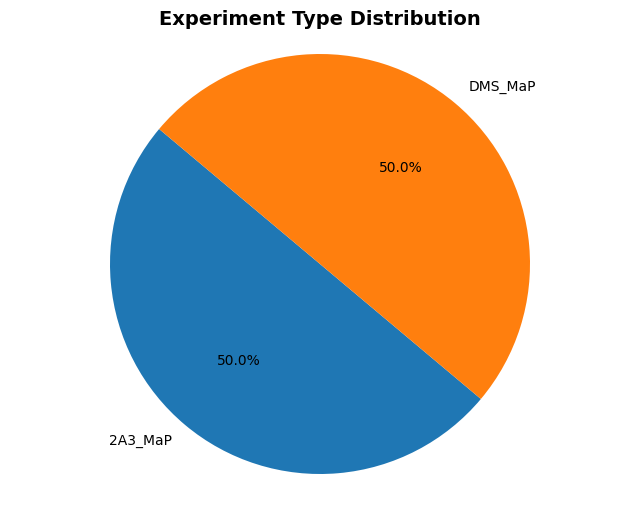

In [ ]:
#Pie chart for 'Experiment type'
experiment_type_counts = train_df['experiment_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(experiment_type_counts, labels=experiment_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Experiment Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

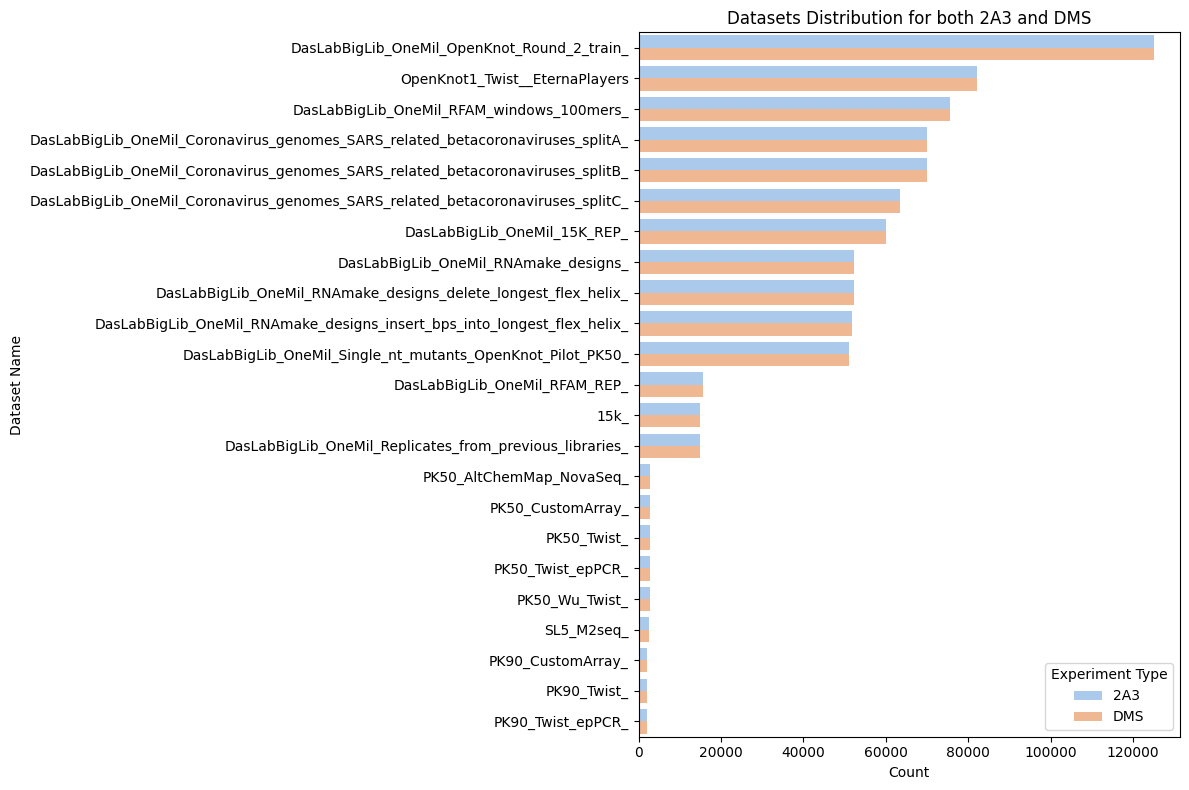

In [ ]:
#Extracting dataset name and experiment type
train_df['dataset_name_'] = train_df['dataset_name'].apply(lambda x: x.replace('DMS', '').replace('2A3', ''))
train_df['experiment_type_'] = train_df['dataset_name'].apply(lambda x: 'DMS' if 'DMS' in x else '2A3')

plt.figure(figsize=(12, 8))
plot = sns.countplot(data=train_df, y='dataset_name_', order=train_df['dataset_name_'].value_counts(ascending=False).index, hue='experiment_type_', palette='pastel')
plt.title('Datasets Distribution for both 2A3 and DMS')
plt.xlabel('Count')
plt.ylabel('Dataset Name')
plt.tight_layout()
plt.legend(title='Experiment Type')
plt.show()

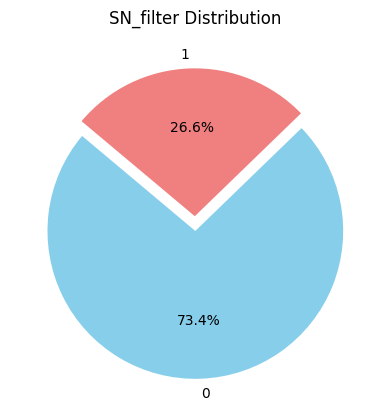

In [ ]:
#Explore the SN_filter distribution
sn_filter_counts = train_df['SN_filter'].value_counts()

colors = ['skyblue', 'lightcoral']
labels = ['0', '1']
explode = (0.1, 0)
plt.pie(sn_filter_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('SN_filter Distribution')
plt.show()

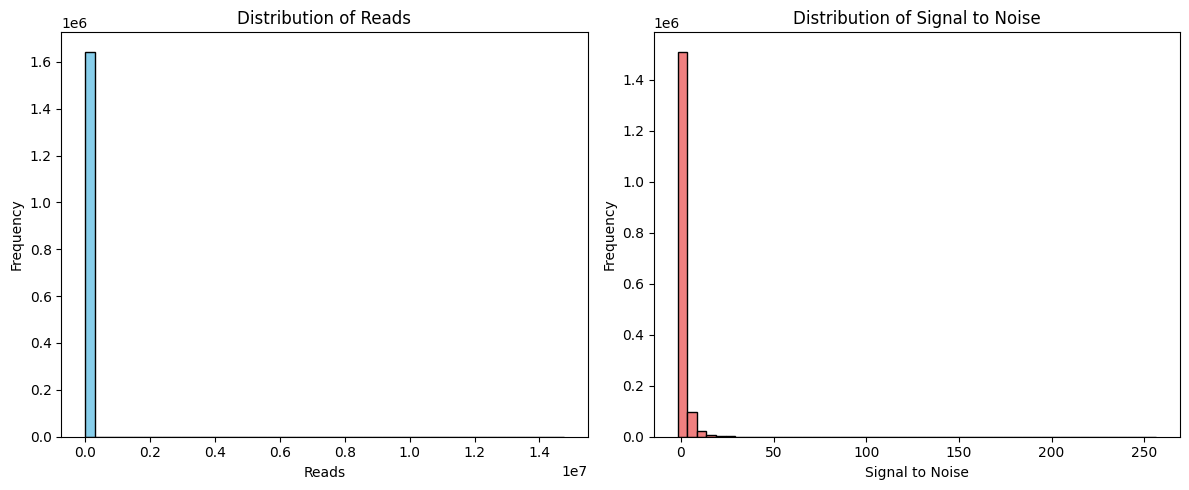

In [ ]:
#Explore the'reads' and 'signal_to_noise' distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Plot the distribution of 'reads'
axes[0].hist(train_df['reads'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Reads')
axes[0].set_xlabel('Reads')
axes[0].set_ylabel('Frequency')

#Plot the distribution of 'signal_to_noise'
axes[1].hist(train_df['signal_to_noise'], bins=50, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribution of Signal to Noise')
axes[1].set_xlabel('Signal to Noise')
axes[1].set_ylabel('Frequency')

#Display the histograms
plt.tight_layout()
plt.show()

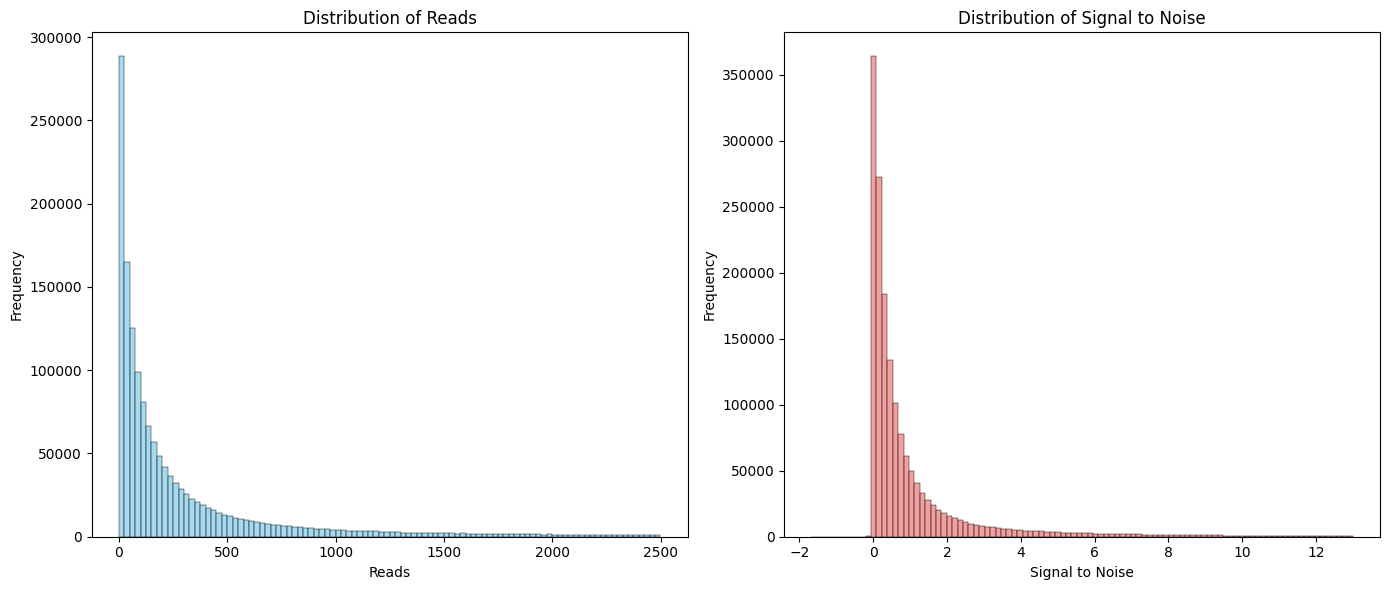

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(train_df[train_df['reads'] < 2500]['reads'], bins=100, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Reads')
axes[0].set_xlabel('Reads')
axes[0].set_ylabel('Frequency')

sns.histplot(train_df[train_df['signal_to_noise'] < 13]['signal_to_noise'], bins=100, color='lightcoral', ax=axes[1])
axes[1].set_title('Distribution of Signal to Noise')
axes[1].set_xlabel('Signal to Noise')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

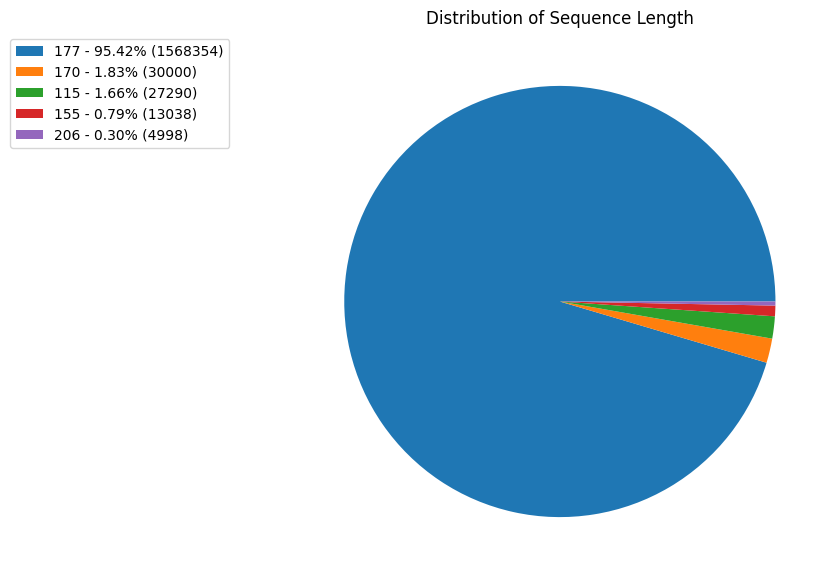

In [ ]:
#Calculate the sequence lengths frequency
train_df['seq_len'] = train_df['sequence'].str.len()

values = train_df['seq_len'].value_counts(normalize=True)
values_abs = train_df['seq_len'].value_counts()
v_counts = values * 100

fig = plt.figure(figsize=(12, 7))
patches, text = plt.pie(v_counts)
labels = ['{0} - {1:1.2f}% ({2})'.format(i, j, k) for i, j, k in zip(values.index, v_counts, values_abs)]
plt.title('Distribution of Sequence Length')
plt.legend(patches, labels, loc='best',
           bbox_to_anchor=(-0.1, 1.),
           fontsize=10)
plt.show()

The vast majority of sequences (1.568.354 out of 1.643.680) have a length of 177 nucleotides.





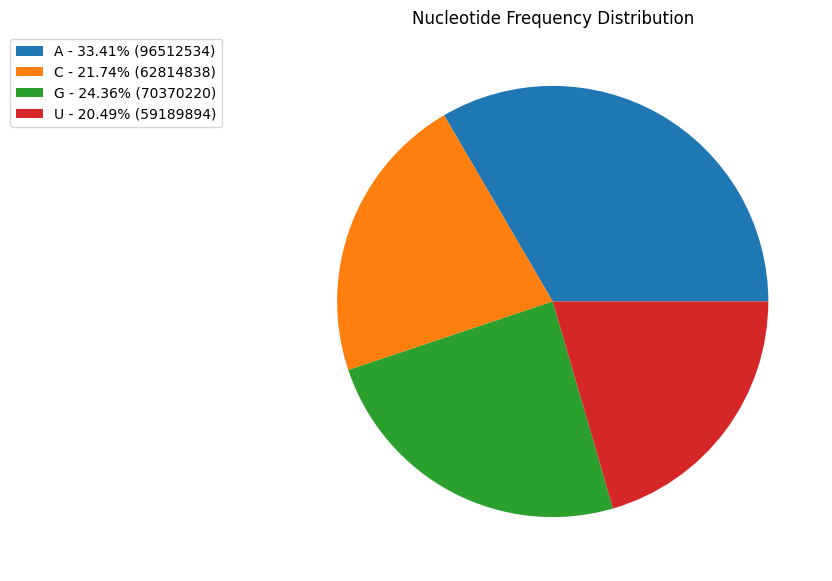

In [ ]:
#Calculate the total nucleotide frequency across all sequences
total_counts = Counter()
for seq in train_df['sequence']:
    total_counts.update(seq)

nucleotide_df = pd.DataFrame(total_counts.items(), columns=['Nucleotide', 'Frequency'])
nucleotide_df = nucleotide_df.sort_values(by="Nucleotide").reset_index(drop=True)

fig = plt.figure(figsize=(12, 7))
patches, text = plt.pie(nucleotide_df['Frequency'])
labels = ['{0} - {1:1.2f}% ({2})'.format(nucleotide, (count/sum(nucleotide_df['Frequency']))*100, count)
          for nucleotide, count in zip(nucleotide_df['Nucleotide'], nucleotide_df['Frequency'])]
plt.title('Nucleotide Frequency Distribution')
plt.legend(patches, labels, loc='best',
           bbox_to_anchor=(-0.1, 1.),
           fontsize=10)
plt.show()

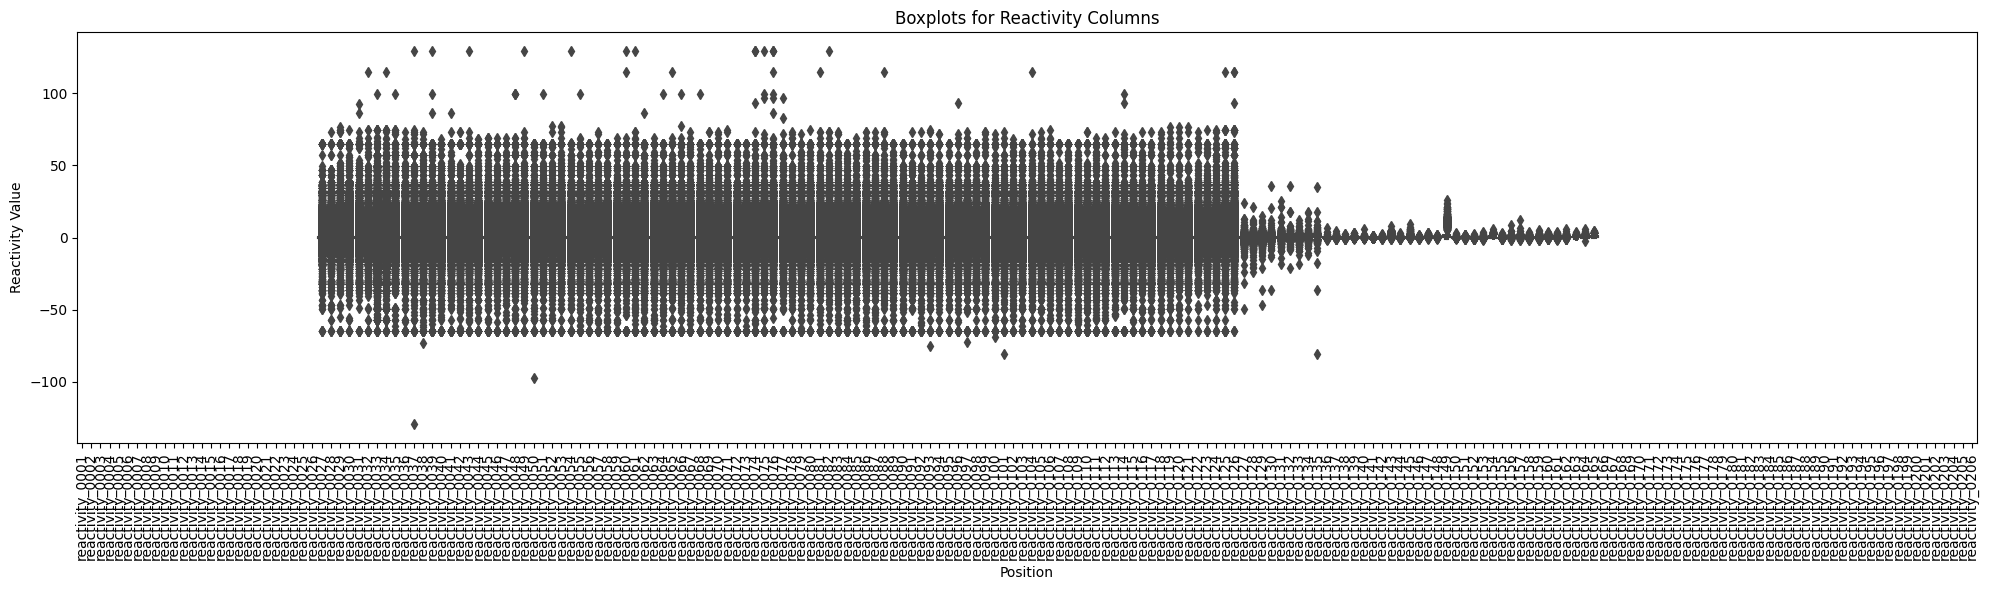

In [ ]:
#Boxplots for the reactivity columns
reactivity_cols = [col for col in train_df.columns if col.startswith('reactivity_') and not col.startswith('reactivity_error_')]

plt.figure(figsize=(20, 6))
sns.boxplot(data=train_df[reactivity_cols])
plt.xticks(rotation=90)
plt.title('Boxplots for Reactivity Columns')
plt.ylabel('Reactivity Value')
plt.xlabel('Position')
plt.tight_layout()
plt.show()

In [ ]:
#Check for NaN values in the train dataset for the following columns
specific_variables = ['sequence', 'experiment_type', 'dataset_name', 'reads', 'signal_to_noise', 'SN_filter']
train_has_nan = train_df[specific_variables].isnull().values.any()

print("Is there NaN for specified variables:", train_has_nan)

Is there NaN for specified variables: False


In [ ]:
#Print the "reactivity_" columns values for the first sequence
first_row = train_df.head(1)
reactivity_columns = [col for col in train_df.columns if col.startswith("reactivity_") and not col.startswith("reactivity_error_")]
reactivity_values = first_row[reactivity_columns]

print("Sequence ID:", first_row.index[0])
print("Reactivity Values:")
print(reactivity_values.to_numpy().flatten())

Sequence ID: 0
Reactivity Values:
[   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan -0.039  0.455 -0.207 -0.098
  0.524 -0.039 -0.138  0.     0.088  0.314  0.647  0.     0.469 -0.075
  0.    -0.075  0.026  0.024 -0.153 -0.114 -0.005  0.207  0.363 -0.015
  0.     0.096  0.386 -0.315  0.402  0.1    0.669  0.451  1.222  2.906
  0.881  1.215  0.473  0.     0.218 -0.009 -0.086  0.076  0.266  0.502
 -0.485 -0.123 -0.183 -0.376 -0.072 -0.364 -0.03   0.052 -0.578  0.071
  0.27   0.318  0.161 -0.042 -0.079 -0.039  0.131 -0.039 -0.134 -0.007
 -0.011 -0.097  0.     0.096  0.309  0.     0.119  0.286  0.107  0.5
 -0.1   -0.02  -0.019  0.053  0.048 -0.155  0.176 -0.049 -0.049  0.315
  0.238 -0.128 -0.089  0.35  -0.118  0.224  0.004 -0.228 -0.157 -0.039
  0.02  -0.059 -0.059  1.004  0.064 -0.079 -0.02  -0.038  0.802    nan
    nan    nan    nan    nan    nan    nan   

In [ ]:
#Print the "reactivity_error" columns values for the first sequence
first_row = train_df.head(1)
reactivity_error_columns = [col for col in train_df.columns if col.startswith("reactivity_error")]
reactivity_error_values = first_row[reactivity_error_columns]

print("Sequence ID:", first_row.index[0])
print("Reactivity Error Values:")
print(reactivity_error_values.to_numpy().flatten())

Sequence ID: 0
Reactivity Error Values:
[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan 0.454 0.357 0.152 0.142 0.126 0.174 0.085 0.085 0.137 0.1
 0.174 0.107 0.1   0.085 0.085 0.085 0.672 0.085 0.114 0.165 0.085 0.085
 0.137 0.204 0.197 0.1   0.189 0.085 0.1   0.126 0.211 0.197 0.237 0.324
 0.417 0.235 0.089 0.12  0.1   0.137 0.183 0.259 0.147 0.278 0.204 0.12
 0.107 0.224 0.188 0.245 1.026 0.085 0.147 0.085 0.085 0.107 0.218 0.276
 0.1   0.1   0.085 0.114 0.085 0.126 0.131 0.1   0.165 0.126 0.085 0.224
 0.1   0.251 0.148 0.227 0.147 0.349 0.47  0.126 0.085 0.1   0.182 0.085
 0.085 0.147 0.174 0.085 0.137 0.248 0.107 0.197 0.085 0.653 0.085 0.224
 0.085 0.085 0.1   0.224 0.286 0.246 0.085 0.224 0.254   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan  

- In the dataset, there's a **defined maximum length for the RNA sequences**. However, not all RNA sequences are this long.
For sequences that are shorter than this maximum length, the data fields (in this case, the reactivity values and errors) **corresponding to the positions beyond the actual length of the RNA are filled with a "null" value**. This is a way to indicate that there's no data for those positions because they don't exist in the shorter RNA sequence.

- Several positions near the beginning and end of the sequence also cannot be probed due to technical reasons, and their reactivity values are null.

Given that our primary interest is in the reactivity columns, we'll visualize the distribution of missing values for the reactivity columns to understand which positions in the sequences have data and which do not.

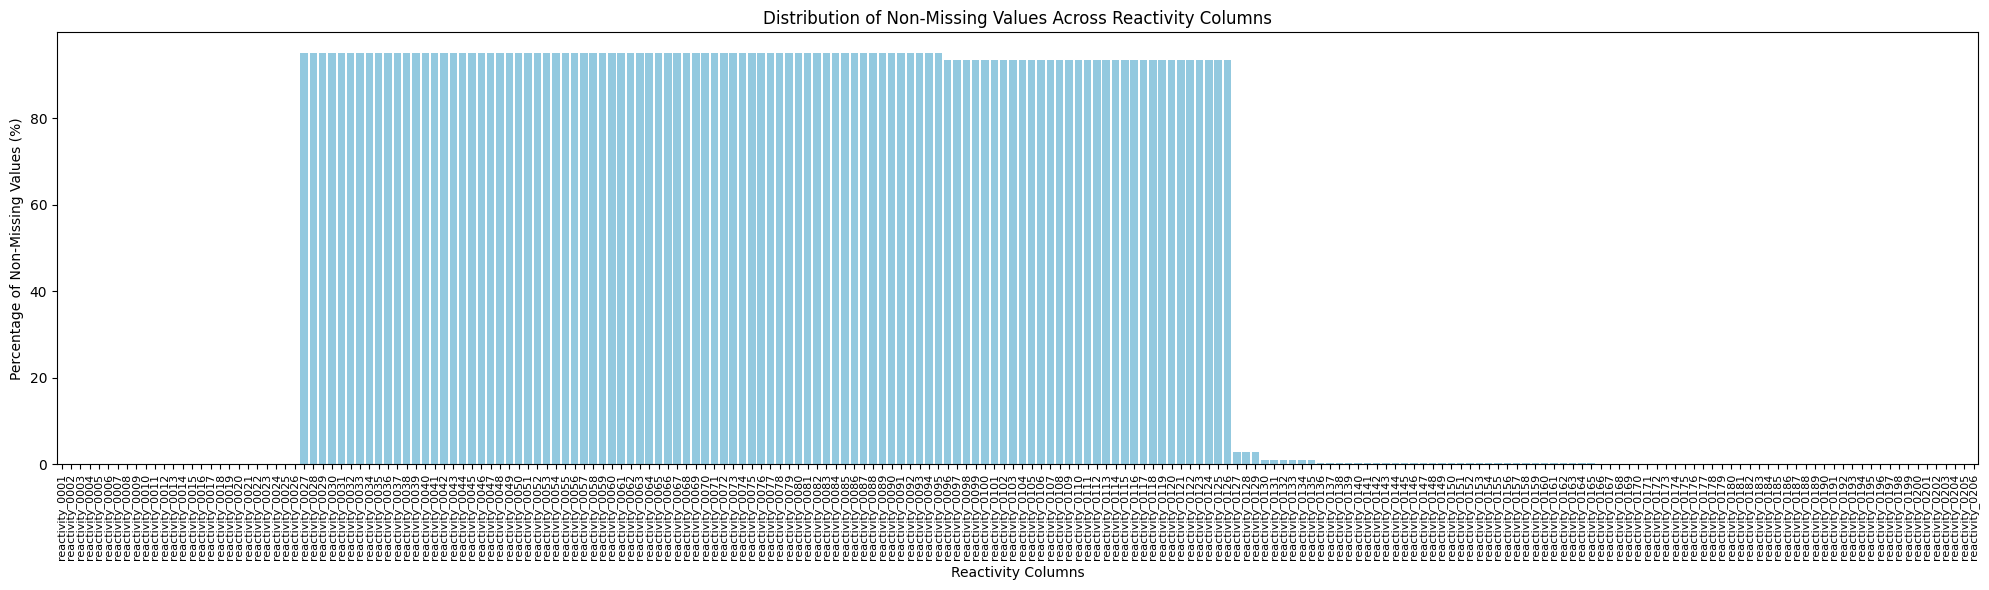

In [ ]:
#Filter out reactivity columns
reactivity_cols = [col for col in train_df.columns if 'reactivity' in col and 'error' not in col]

#Percentage of non-missing values for each reactivity column
non_missing_percentage = (train_df[reactivity_cols].notnull().mean() * 100)
non_missing_percentage = pd.Series(non_missing_percentage)

#Plot the distribution of non-missing values across reactivity columns
plt.figure(figsize=(20, 6))
sns.barplot(x=non_missing_percentage.index, y=non_missing_percentage.values, color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Percentage of Non-Missing Values (%)')
plt.xlabel('Reactivity Columns')
plt.title('Distribution of Non-Missing Values Across Reactivity Columns')
plt.tight_layout()
plt.show()

For the majority of positions at the beginning of the sequences, almost 100% of the data is available. As we move towards the end of the sequences, the percentage of available data drops significantly. Many positions, especially towards the end of the sequences, have no reactivity data available.

In [ ]:
# Count sequences with SN_filter equal to 0
# Sequences for which no SN_filter has been applied
# These are sequences with signal_to_noise < 1 and reads < 100
count_SN_filter_0 = (train_df['SN_filter'] == 0).sum()
print("Number of rows with SN_filter equal to 0:", count_SN_filter_0)

Number of rows with SN_filter equal to 0: 1205763


We can't remove the sequences with SN_filter equal to 0 (i. e. sequences with signal_to_noise < 1 and reads < 100) because doing so would result in the loss of a significant portion of the data (1.205.763 sequences from a total of 1.643.680 sequences).

In [ ]:
#Count sequences with signal_to_noise equal to 0
signal_to_noise_0 = (train_df['signal_to_noise'] == 0).sum()
print("Number of rows with signal_to_noise = 0:", signal_to_noise_0)

Number of rows with signal_to_noise = 0: 90215


In [ ]:
#Count sequences with reads equal to 0
reads_equal_to_0 = (train_df['reads'] == 0).sum()
print("Number of rows with reads equal to 0:", reads_equal_to_0)

Number of rows with reads equal to 0: 37867


## Feature engineering

### Create functions

In [ ]:
#We propose to use mmap for a fast reading

#Function to compute sequence number--------------------------------------------

def get_seq_number(data_file):
  """
  This fucntion allows to get sequence number in data_file
  input:
    data_file path to train data
  output:
    seq_number  sequence number count
  """
  seq_number = 0
  with open(data_file, "r") as train_file:
    with mmap.mmap(train_file.fileno(), length = 0, access = mmap.ACCESS_READ) as mmap_input: #map the file in order to increase the speed of reading
      #Skip header
      mmap_input.readline()
      #Count lines
      while mmap_input.readline():
        seq_number += 1
  return seq_number

#Define function to get list of database---------------------------------------

def get_database_list(data_file):
  """
  This fucntion allows to get lis of database
  input:
    data_file path to train data
  output:
    database_list list of detected database
  """
  #Create empty database list
  database_list = []

  #Parse data file
  with open(data_file, "r") as train_file:
    with mmap.mmap(train_file.fileno(), length = 0, access = mmap.ACCESS_READ) as mmap_input:
      #Skip header
      mmap_input.readline()
      #Initialize parameters
      i = 0
      previous_database = ""
      start = 1
      #Looking RNA sequences for database name
      for i in range(seq_number):
        line = mmap_input.readline() #line in byte
        line = line.decode()
        database = line.strip().split(",")[3]
        #Initialise parameters
        if i == 0:
          previous_database = database
          start = i + 1
        #Add databse location
        if (database != previous_database) or (i == seq_number - 1):
          end = i
          database_list.append((previous_database, start, end))
          #Update parameters
          start = i + 1
        #Updata previous_database
        previous_database = database
  return database_list

In [ ]:
#Define fucntion for feature engeneering

#Function to get positon to trim------------------------------------------------

def get_trim_position(reactivity_2A3, reactivity_DMS):
  """
  This function allows to get start and end position to trim
  the RNA sequence from 2A3 and DMS reactivity values
  input:
    reactivity_2A3  pd.series 2A3 reactivity values for a given sequence
    reactivity_DMS  pd.series DMS reactivity values for a given sequence
  return
    start_seq       int   start trim position
    end_seq         int   end trim position
  """
  #Define regular expressions to extract position from columns names
  regex = re.compile("[0-9]+")
  #Extract columns names with reactivity values
  reactivity_2A3 = reactivity_2A3.dropna(axis = 1).columns
  reactivity_DMS = reactivity_DMS.dropna(axis = 1).columns

  #extract start and end columns position for 2A3
  start_2A3 = int(regex.search(reactivity_2A3[0]).group(0))
  end_2A3 = int(regex.search(reactivity_2A3[-1]).group(0))

  #extract start and end columns position for DMS
  start_DMS = int(regex.search(reactivity_DMS[0]).group(0))
  end_DMS = int(regex.search(reactivity_DMS[-1]).group(0))

  #Looking for start and end seq trim position
  start_seq = max(start_2A3, start_DMS) - 1
  end_seq = min(end_2A3, end_DMS) - 1

  return start_seq, end_seq

#Function to trim a sequence----------------------------------------------------

def trim_seq(sequence, start_seq, end_seq, seq_size):
  """
  This function allows to trim a given sequence between
  a start and end position and stuff the side by N base
  """
  sequence = f"{'N'*(start_seq - 1)}{sequence[start_seq:end_seq + 1]}{'N'*(seq_size - end_seq)}"
  return sequence

#Function to get base pair probabilities----------------------------------------

def get_bpps(sequence):
  """
  This function allows to build bpps matrix
  as known as contact map and flat them. It use
  Eternafold package
  """
  bpps_matrix = bpps(sequence, package = "eternafold")
  bpps_flat = list(bpps_matrix.flatten())
  return bpps_flat

#Function to encode a sequence--------------------------------------------------

def encode_seq(sequence):
  """
  This function allows to encode a given sequence into a integer list for RNN input
  input:
    sequence      str   a RNA sequence
  return
    sequence_list list  a list of integer
  """
  #Define encoding dictionnary
  dict_base = {"N":0,"A":1, "U":2, "G":3, "C":4}
  #Define sequence list object to return
  sequence_list = []
  #Encode the sequence through a loop
  for base in sequence:
    encoded_base = dict_base[base]
    sequence_list.append(encoded_base)
  return sequence_list

In [ ]:
#Define fucntion to extract patterns

def get_chemical_patterns(data_file):
  """
  This function allows to get col names and reactivity index for
  each chemical product (2A3 and DMS)
  input:
    data_file str path to data file
  return:
    patterns  tuple a tuple which contains col names and reactivity
    index in the following order: 2A3, DMS
  """
  with open(data_file, "r") as train_file:
    col_names = train_file.readline().strip().split(",")

  #Create col_name value for 2A3 and DMS dataset
  col_names_2A3 = ["sequence_id"]
  col_names_DMS = ["sequence_id"]

  for chemical in ["2A3", "DMS"]:
    for column_index in range(1, len(col_names)):
      if chemical == "2A3":
        col_names_2A3.append(f"{col_names[column_index]}_{chemical}")
      else:
        col_names_DMS.append(f"{col_names[column_index]}_{chemical}")

  #Extract reactivity column name from

  ##compile regular expressions
  regex_reactivity = re.compile("^reactivity_[0-9]+")
  #regex_reactivity_error = re.compile("^reactivity_error_[0-9]+")

  #Extract corresponding column names
  index_2A3_reactivity = list(filter(regex_reactivity.match, col_names_2A3))
  #index_2A3_reactivity_error = list(filter(regex_reactivity_error.match, col_names_2A3))

  index_DMS_reactivity = list(filter(regex_reactivity.match, col_names_DMS))
  #index_DMS_reactivity_error = list(filter(regex_reactivity_error.match, col_names_DMS))

  patterns = (col_names_2A3, col_names_DMS, index_2A3_reactivity, index_DMS_reactivity)
  return patterns

In [ ]:
#Define function to initialize a csv file

def init_csv_file(db_name, seq_size, index_2A3_reactivity, index_DMS_reactivity):
  """
  This function allows to initialize a csv file to write
  """
  pos_list = []
  for i in range(seq_size):
    position = "pos_" + str(i)
    pos_list.append(position)

  array_pos = []
  for i in range(seq_size):
    for j in range(seq_size):
      position = "bpps_" + i + "_" + j
      array_pos.append(position)

  #File for sequence and reactivity values
  with open(f"../output/{db_name}.csv", "w") as csv_output:
    for column_names in [pos_list, index_2A3_reactivity, index_DMS_reactivity]:
      for column_name in column_names:
        csv_output.write(f"{column_name},")
    for column_name in array_pos:
      if column_name == "bpps_205_205":
        csv_output.write(f"{column_name}\n")
      else:
        csv_output.write(f"{column_name},") #comma separator

In [ ]:
#Define functions for parallel reading

#Function which craete argument list--------------------------------------------

def create_arg_list(data_file, database_list, seq_size):
  """
  This function allows to create argument list for
  parallelized parsing task
  input:
    data_file path to data train
    database_list list of database
    seq_size  sequence size in transformed data
  return:
    args  list of argument for process database fucntion
  """
  #Create empty args list
  args = []
  #First get pattern from file
  patterns = get_chemical_patterns(data_file)
  for db_index in range(0, len(database_list), 2):
    db_name = database_list[db_index][0].split("_2A3")[0]
    start_2A3, end_2A3 = database_list[db_index][1:3]
    start_DMS, end_DMS = database_list[db_index + 1][1:3]
    arg = (data_file, db_name, start_2A3, end_2A3, start_DMS, end_DMS,
           patterns[0], patterns[1], patterns[2], patterns[3],
           seq_size)
    args.append(arg)
  return args

#Function to porcess a given database-------------------------------------------

def process_database(data_file, db_name,
                     start_2A3, end_2A3, start_DMS, end_DMS,
                     col_names_2A3,col_names_DMS,
                     index_2A3_reactivity, index_DMS_reactivity,
                     seq_size):
  """
  This function allows to deal with a database
  input:
    arg tuple of argument provided by create_arg_list
  """
  train_2A3 = pd.read_csv(data_file, skiprows =  start_2A3, nrows = end_2A3 - start_2A3 + 1)
  train_DMS = pd.read_csv(data_file, skiprows =  start_DMS, nrows = end_DMS - start_DMS + 1)

  #Format columns names
  train_2A3.columns = col_names_2A3
  train_DMS.columns = col_names_DMS

  #Join data frame
  train_merge = pd.merge(train_2A3, train_DMS, on = "sequence_id", how = "inner")

  #Remove no identical sequence
  index_ident_seq = train_merge["sequence_2A3"] == train_merge["sequence_DMS"]
  train_merge = train_merge[index_ident_seq]

  #Mutate sequence_2A3 sequence_DMSO into a simple sequence column
  train_merge = train_merge.rename(columns = {"sequence_2A3": "sequence"}).drop(labels = "sequence_DMS", axis = 1)

  #Initialize output file
  init_csv_file(db_name, seq_size, index_2A3_reactivity, index_DMS_reactivity)

  #Format sequence and reactivity values
  for i in range(train_merge.shape[0]):
    #Extract recativity values from a given line
    reactivity_2A3 = train_merge.loc[[i], index_2A3_reactivity]
    reactivity_DMS = train_merge.loc[[i], index_DMS_reactivity]

    #Continue any one reactivity value are provided
    #All columns contains Na value => id to drop
    if reactivity_2A3.dropna(axis = 1).shape[1] != 0 and reactivity_DMS.dropna(axis = 1).shape[1] != 0:
       #Compute start and end trim position
      start_seq, end_seq = get_trim_position(reactivity_2A3, reactivity_DMS)
      #Extract the sequence from the line
      sequence = train_merge.iloc[[i]]["sequence"].values[0]
      #Trim the RNA sequence
      sequence = trim_seq(sequence, start_seq, end_seq, seq_size)
      #Get bpps array
      bpps_array = get_bpps(sequence)
      #Encode the sequence
      encoded_seq = encode_seq(sequence)

      #Pad reactivity for Nan
      reactivity_2A3.iloc[0][reactivity_2A3.columns[:start_seq]] = - 1000
      reactivity_2A3.iloc[0][reactivity_2A3.columns[end_seq + 1:]] = - 1000
      reactivity_DMS.iloc[0][reactivity_DMS.columns[:start_seq]] = - 1000
      reactivity_DMS.iloc[0][reactivity_DMS.columns[end_seq + 1:]] = - 1000

      #Convert reactivity into list
      reactivity_2A3 = reactivity_2A3.values.tolist()[0]
      reactivity_DMS = reactivity_DMS.values.tolist()[0]

      #Write result in database file
      with open(f"../output/{db_name}.csv", "a") as output_file:
        for value in encoded_seq:
          output_file.write(f"{value},")
        for value in reactivity_2A3:
          output_file.write(f"{value},")
        #Write reactivities values
        for value in reactivity_DMS:
          output_file.write(f"{value},")
        #Write bpps array
        for index, bpps_value in enumerate(bpps_array):
          #end of the line
          if index == len(bpps_array) - 1:
            output_file.write(f"{bpps_value}\n")
          else:
            output_file.write(f"{bpps_value},")

#Function to do a parallel reading----------------------------------------------

def parallel_process(args, cpu):
  """
  This function allows to do a parallel database treatment
  """
  with mp.Pool(cpu) as p:
    p.starmap(process_database, args)

In [ ]:
#Lauch parallel feature engeneering

CPU = 2
SEQ_SIZE = 206
train_data = "train_data.csv"
#get sequence number
print("Execute get_seq_number function")
seq_number = get_seq_number(train_data)
print(f"Train data contains {seq_number} RNA sequences.")

#get database list
print("Execute get_database_list function")
database_list = get_database_list(train_data)

#Create args list
print("Create args list")
args = create_arg_list(train_data, database_list, SEQ_SIZE)

#Parallel database treatment
print("Execute treatment")
parallel_process(args, CPU)

### Get column names

In [ ]:
for db_index in range(1, len(database_list), 2):
  #Get database location in train data
  db_2A3 = database_list[db_index - 1]
  db_DMS = database_list[db_index]
  print(f'Looking {db_2A3[0].split("_2A3")[0]} database...')

  #Extract 2A3 and DMS information from a given database
  train_2A3 = pd.read_csv("train_data.csv", skiprows =  db_2A3[1], nrows = db_2A3[2] - db_2A3[1] + 1)
  train_DMS = pd.read_csv("train_data.csv", skiprows =  db_DMS[1], nrows = db_DMS[2] - db_DMS[1] + 1)

  #Format columns names
  train_2A3.columns = col_names_2A3
  train_DMS.columns = col_names_DMS

  #Join data frame
  train_merge = pd.merge(train_2A3, train_DMS, on = "sequence_id", how = "inner")

  #Remove no identical sequence
  index_ident_seq = train_merge["sequence_2A3"] == train_merge["sequence_DMS"]
  train_merge = train_merge[index_ident_seq]

  #Mutate sequence_2A3 sequence_DMSO into a simple sequence column
  train_merge = train_merge.rename(columns = {"sequence_2A3": "sequence"}).drop(labels = "sequence_DMS", axis = 1)

  #Format sequence and reactivity values
  for i in range(train_merge.shape[0]):
    #Extract recativity values from a given line
    reactivity_2A3 = train_merge.loc[[i], index_2A3_reactivity]
    reactivity_DMS = train_merge.loc[[i], index_DMS_reactivity]

    #Continue any one reactivity value are provided
    #All columns contains Na value => id to drop
    if reactivity_2A3.dropna(axis = 1).shape[1] != 0 and reactivity_DMS.dropna(axis = 1).shape[1] != 0:
       #Compute start and end trim position
      start_seq, end_seq = get_trim_position(reactivity_2A3, reactivity_DMS)
      #Extract the sequence from the line
      sequence = train_merge.iloc[[i]]["sequence"].values[0]
      #Trim the RNA sequence
      sequence = trim_seq(sequence, start_seq, end_seq, SEQ_SIZE)
      #Encode the sequence
      encoded_seq = encode_seq(sequence)

      #Pad reactivity for Nan
      reactivity_2A3.iloc[0][reactivity_2A3.columns[:start_seq]] = - 1000
      reactivity_2A3.iloc[0][reactivity_2A3.columns[end_seq + 1:]] = - 1000
      reactivity_DMS.iloc[0][reactivity_DMS.columns[:start_seq]] = - 1000
      reactivity_DMS.iloc[0][reactivity_DMS.columns[end_seq + 1:]] = - 1000

      #Convert reactivity into list
      reactivity_2A3 = reactivity_2A3.values.tolist()[0]
      reactivity_DMS = reactivity_DMS.values.tolist()[0]

      #Write result in new_train_data.csv
      with open("new_train_data.csv", "a") as output_file:
        for index, result_list in enumerate([encoded_seq, reactivity_2A3, reactivity_DMS]):
          for index_list in range(len(result_list)):
            #End case
            if index == 2 and index_list == len(result_list) - 1:
              output_file.write(f"{result_list[index_list]}\n")
            else:
              output_file.write(f"{result_list[index_list]},")

In [ ]:
#Example: Build bpps matrix from an extracted line from new_train_data.csv

with open("new_train_data.csv", "r") as input_file:
  #Skip header
  input_file.readline()
  line = input_file.readline()

#Extract encoded sequence
line = line.split(",")[:206]
sequence = [eval(i) for i in line]

#Decode the sequence
sequence = decode_seq(sequence)

#Get bbps matrix
bpps_matrix = get_bpps_matrix(sequence)

#Visualising bpps_matrix (contact map)

## Modelisation

### Import modules

In [ ]:
from google.colab import drive
import mmap
import tensorflow as tf
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, GRU, LSTM, Layer, Flatten, Conv1D, Conv2D, Embedding, Attention, Add, Concatenate, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

### Download and unzip datas

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp drive/MyDrive/Projet_RNA/15k.zip .

In [ ]:
#Create a small version of 15k.zip for a quick learn in colab
!zcat 15k.zip | head -n 500 > 15k_small.csv

### Create functions for stream reading

In [ ]:
def get_sequence(*args):
  """
  This function allow to extract sequences from tensor dataset
  """
  args = list(args)
  sequence = []
  for i, sub_element in enumerate(args):
    if i < 206:
      sequence.append(sub_element)
  return sequence

def get_reactivity(*args):
  """
  This function allows to extract reactivities from tensor dataset
  """
  args = list(args)
  reactivity = []
  for i, sub_element in enumerate(args):
    if i >= 206 and i < 618:
      reactivity.append(sub_element)
  return reactivity

def get_bpps(*args):
  """
  This function allows to extract bpps flatted matrix from tensor dataset
  """
  args = list(args)
  bpps = []
  for i, subelement in enumerate(args):
    if i >= 618:
      bpps.append(subelement)
  return bpps

def stack_tensor(*args):
  element = tf.stack(args)
  return element

### Get number of sequences

In [ ]:
seq_number = 0
with open("15k_small.csv", "r") as input_file:
  with mmap.mmap(input_file.fileno(), length = 0, access = mmap.ACCESS_READ) as input_mmap:
    #Get column number from header
    col_number = len(input_mmap.readline().decode().split(","))
    #Count sequences
    while input_mmap.readline():
      seq_number += 1

### Define train and validation dataset size

In [ ]:
split_ratio = 0.2
validation_size = int(split_ratio * seq_number)
train_size = seq_number - validation_size

### Prepare train and validation dataset

In [ ]:
#Define list a data type
column_type = []
for i in range(col_number):
  column_type.append(tf.float32)

In [ ]:
#Load dataset
all_data = tf.data.experimental.CsvDataset("15k_small.csv",
                                       record_defaults = column_type,
                                       header = True,
                                       field_delim = ",")

In [ ]:
#Shuffle dataset
all_data = all_data.shuffle(buffer_size = 100, seed = 42)

In [ ]:
#Extract sequences and reactivities sub dataset
sequences = all_data.map(get_sequence).map(stack_tensor)
reactivities = all_data.map(get_reactivity).map(stack_tensor)
bpps_cnn = all_data.map(get_bpps).map(stack_tensor)

In [ ]:
#Build train and validation dataset
train_sequence = sequences.take(train_size).batch(100).prefetch(buffer_size = 100)
val_sequences = sequences.skip(train_size).batch(100).prefetch(buffer_size = 100)

train_reactivities = reactivities.take(train_size).batch(100).prefetch(buffer_size = 100)
val_reactivities = reactivities.skip(train_size).batch(100).prefetch(buffer_size = 100)

train_bpps = bpps_cnn.take(train_size).batch(100).prefetch(buffer_size = 100)
val_bpps = bpps_cnn.skip(train_size).batch(100).prefetch(buffer_size = 100)

In [ ]:
# Zip together the inputs and targets
# ((input_1, input_2), target)
train_dataset = tf.data.Dataset.zip(((train_sequence, train_bpps), train_reactivities))
val_dataset = tf.data.Dataset.zip(((val_sequences, val_bpps), val_reactivities))


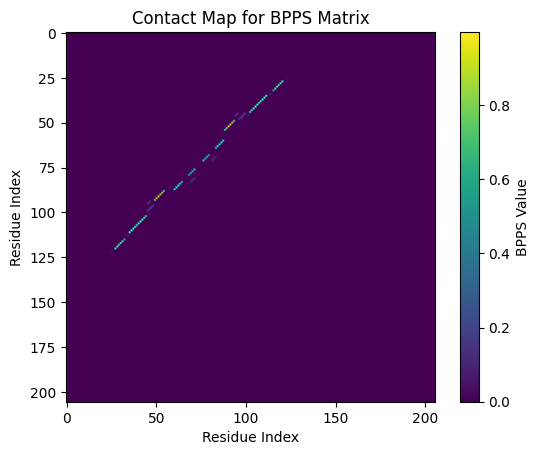

In [ ]:
#Visualising bpps_matrix (contact map)

# Extract a single BPPS matrix for visualization
single_bpps = next(iter(bpps_cnn.take(1).as_numpy_iterator()))
reshaped_bpps = np.reshape(single_bpps, (206, 206))

# Visualizing the reshaped BPPS matrix
plt.imshow(reshaped_bpps, cmap='viridis')
plt.colorbar(label='BPPS Value')
plt.title("Contact Map for BPPS Matrix")
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.show()

### Build a simple LSTM model with sequence

In [ ]:
#Create train and test dataset
train_dataset = tf.data.Dataset.zip(train_sequence, train_reactivities)
val_dataset = tf.data.Dataset.zip(val_sequences, val_reactivities)

In [ ]:
# Build model in functional mode
input_seq = Input(shape=(206, 1), name="sequence")  # sequence

# GRU on input
gru_1 = LSTM(units=64,
            activation="tanh",
            recurrent_activation="sigmoid",
            return_sequences=True)(input_seq)

dropout_1 = Dropout(0.2)(gru_1)

flat = Flatten()(dropout_1)  # Flatten the output for the Dense layer

# Dense layers
dense_1 = Dense(units=206, activation="relu")(flat)

dropout_2 = Dropout(0.2)(dense_1)

# Output dense layer
output_final = Dense(units=412, activation=None)(dropout_2)

# combine the model
model = Model(inputs=input_seq, outputs=output_final)

#Create checkpoints to save the model across training
checkpoint = ModelCheckpoint(filepath = 'model_checkpoint.h5', #file path
                             save_best_only = True, #save only the best model
                             monitor = 'val_loss', #variable to monitor to save model
                             mode = 'min',
                             verbose = 1)

#Create early stoppings
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, restore_best_weights = True)

#compile the model
model.compile(loss = MeanSquaredError(),
              metrics = [MeanSquaredError(), MeanAbsoluteError()],
              optimizer = 'adam')

In [ ]:
#View model summary
mdoel.summary()

In [ ]:
#plot model
plot_model(model)

### Fit the mdoel

In [ ]:
history = model.fit(
    train_dataset,                # Tuple of inputs and targets (or "labels")
    validation_data = val_dataset,  # Data for validation
    epochs = 10,
    batch_size = 100,
    callbacks = [early_stopping, checkpoint]
)

### Build a simple GRU model

In [ ]:
#Create train and test dataset
train_dataset = tf.data.Dataset.zip(train_sequence, train_reactivities)
val_dataset = tf.data.Dataset.zip(val_sequences, val_reactivities)

In [ ]:
# Build model in functional mode
input_seq = Input(shape=(206, 1), name="sequence")  # sequence

# GRU on input
gru_1 = GRU(units=64,
            activation="tanh",
            recurrent_activation="sigmoid",
            return_sequences=True)(input_seq)

dropout_1 = Dropout(0.2)(gru_1)

flat = Flatten()(dropout_1)  # Flatten the output for the Dense layer

# Dense layers
dense_1 = Dense(units=206, activation="relu")(flat)

dropout_2 = Dropout(0.2)(dense_1)

# Output dense layer
output_final = Dense(units=412, activation=None)(dropout_2)

# combine the model
model = Model(inputs=input_seq, outputs=output_final)

#Create checkpoints to save the model across training
checkpoint = ModelCheckpoint(filepath = 'model_checkpoint.h5', #file path
                             save_best_only = True, #save only the best model
                             monitor = 'val_loss', #variable to monitor to save model
                             mode = 'min',
                             verbose = 1)

#Create early stoppings
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, restore_best_weights = True)

#compile the model
model.compile(loss = MeanSquaredError(),
              metrics = [MeanSquaredError(), MeanAbsoluteError()],
              optimizer = 'adam')

In [ ]:
#Get model summary
model.summary()

In [ ]:
#Plot model
plot_model(model)

### Fi the model

In [ ]:
history = model.fit(
    train_dataset,                # Tuple of inputs and targets (or "labels")
    validation_data = val_dataset,  # Data for validation
    epochs = 10,
    batch_size = 100,
    callbacks = [early_stopping, checkpoint]
)

### Build a GRU combined with CNN model

In [ ]:
# Zip together the inputs and targets
# ((input_1, input_2), target)
train_dataset = tf.data.Dataset.zip(((train_sequence, train_bpps), train_reactivities))
val_dataset = tf.data.Dataset.zip(((val_sequences, val_bpps), val_reactivities))

In [ ]:
#Build model in focntionnal mode
input_1 = Input(shape = (206, 1), name = "sequence") #sequence
input_2 = Input(shape = (206*206, 1), name = "bpps") #bpps

#CNN with input_2
input_2_reshape = Reshape(target_shape = (206, 206, 1), input_shape = (206*206, 1, 1))(input_2)

conv_2d_1 = Conv2D(filters = 32,
                   kernel_size = (3,3),
                   strides = (1, 1),
                   activation = "relu",
                   padding = "same")(input_2_reshape)

batch_norm_1 = BatchNormalization()(conv_2d_1)

max_pool_1 = MaxPooling2D(pool_size = (2, 2))(batch_norm_1)

flat_1 = Flatten()(max_pool_1)

#GRU on input_1
gru_1 = GRU(units = 32,
            recurrent_activation = "sigmoid",
            return_sequences = True)(input_1)

dropout_1 = Dropout(0.2)(gru_1)

flat_2 = Flatten()(dropout_1)
#Concatenate result
global_output = concatenate([flat_1, flat_2])

#Output dense layer
output_final = Dense(units = 412, kernel_initializer = "normal", activation = None)(global_output)

#combine the model
model = Model(inputs = [input_1, input_2], outputs = output_final)

#Create checkpoints to save the model across training
checkpoint = ModelCheckpoint(filepath = 'model_checkpoint.h5', #file path
                             save_best_only = True, #save only the best model
                             monitor = 'val_loss', #variable to monitor to save model
                             mode = 'min',
                             verbose = 1)

#Create early stoppings
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, restore_best_weights = True)

#compile the model
model.compile(loss = MeanSquaredError(),
              metrics = [MeanSquaredError(), MeanAbsoluteError()],
              optimizer = 'adam')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 bpps (InputLayer)           [(None, 42436, 1)]           0         []                            
                                                                                                  
 reshape_2 (Reshape)         (None, 206, 206, 1)          0         ['bpps[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)           (None, 206, 206, 32)         320       ['reshape_2[0][0]']           
                                                                                                  
 sequence (InputLayer)       [(None, 206, 1)]             0         []                            
                                                                                            

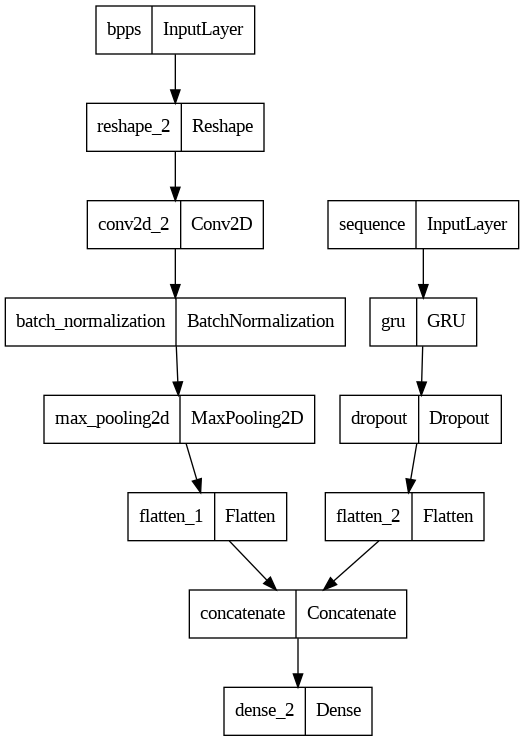

In [ ]:
plot_model(model)

### Fit the model

In [ ]:
# Train the model
history = model.fit(
    train_dataset,                # Tuple of inputs and targets (or "labels")
    validation_data = val_dataset,  # Data for validation
    epochs = 10,
    batch_size = 100,
    callbacks = [early_stopping, checkpoint]
)

### Build a LSTM combined with CNN model

In [ ]:
# Zip together the inputs and targets
# ((input_1, input_2), target)
train_dataset = tf.data.Dataset.zip(((train_sequence, train_bpps), train_reactivities))
val_dataset = tf.data.Dataset.zip(((val_sequences, val_bpps), val_reactivities))

In [ ]:
# Input layers
input_1 = Input(shape=(206, 1), name="sequence")  # sequence
input_2 = Input(shape=(206, 206, 1), name="bpps")  # bpps

# CNN with input_2
conv_2d_1 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same")(input_2)
max_pool_1 = MaxPooling2D(pool_size=(2, 2))(conv_2d_1)
flat_1 = Flatten()(max_pool_1)
flat_1 = Dropout(0.2)(flat_1)
flat_1 = BatchNormalization()(flat_1)

# LSTM on input_1
lstm_1 = LSTM(units=64, return_sequences=True)(input_1)
lstm_2 = LSTM(units=64, return_sequences=True)(lstm_1)
flat_2 = Flatten()(lstm_2)
flat_2 = Dropout(0.2)(flat_2)
flat_2 = BatchNormalization()(flat_2)

# Concatenate result
global_output = concatenate([flat_1, flat_2])

# Additional fully connected layers
dense_1 = Dense(units=256, activation="relu")(global_output)
dense_1 = Dropout(0.2)(dense_1)
dense_1 = BatchNormalization()(dense_1)

dense_2 = Dense(units=128, activation="relu")(dense_1)

# Output dense layer
output_final = Dense(units=412, kernel_initializer="normal", activation="linear")(dense_2)

# Combine the model
model = Model(inputs=[input_1, input_2], outputs=output_final)

#Create checkpoints to save the model across training
checkpoint = ModelCheckpoint(filepath = 'model_checkpoint.h5', #file path
                             save_best_only = True, #save only the best model
                             monitor = 'val_loss', #variable to monitor to save model
                             mode = 'min',
                             verbose = 1)

#Create early stoppings
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, restore_best_weights = True)

#compile the model
model.compile(loss = MeanSquaredError(),
              metrics = [MeanSquaredError(), MeanAbsoluteError()],
              optimizer = 'adam')

In [ ]:
# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 bpps (InputLayer)           [(None, 206, 206, 1)]        0         []                            
                                                                                                  
 sequence (InputLayer)       [(None, 206, 1)]             0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 206, 206, 32)         320       ['bpps[0][0]']                
                                                                                                  
 lstm (LSTM)                 (None, 206, 64)              16896     ['sequence[0][0]']            
                                                                                              

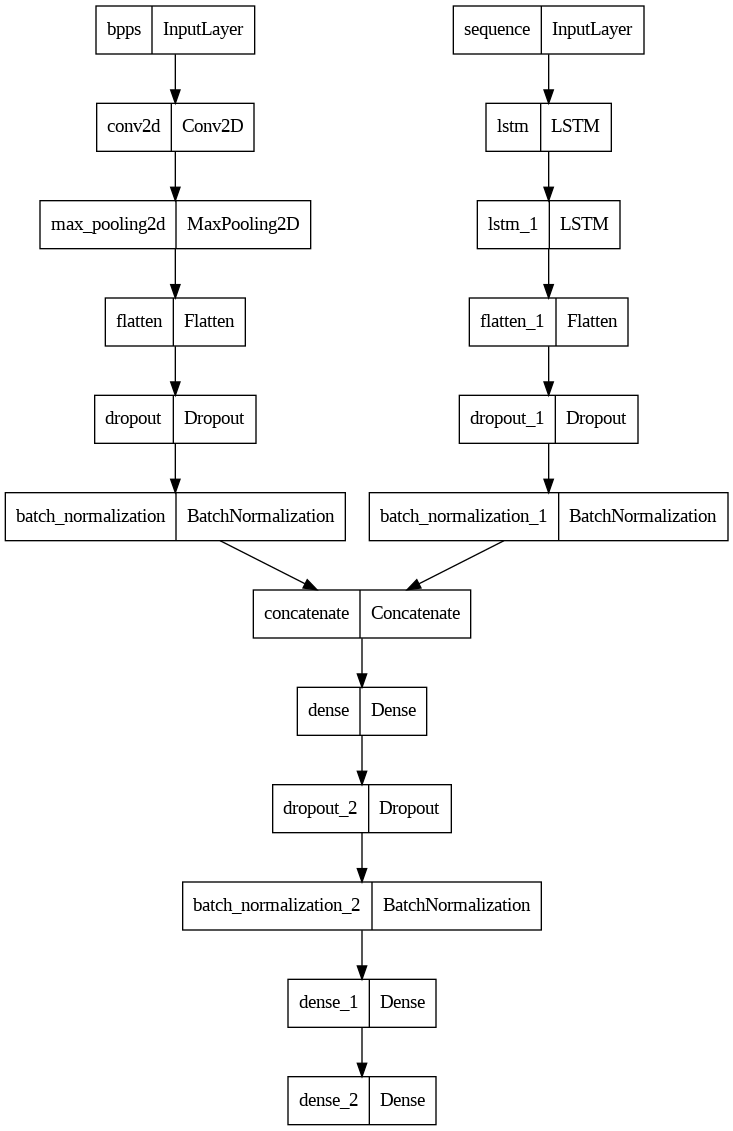

In [ ]:
plot_model(model)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,                # Tuple of inputs and targets (or "labels")
    validation_data = val_dataset,  # Data for validation
    epochs = 10,
    batch_size = 100,
    callbacks = [early_stopping, checkpoint]
)

### Nullrecurrent (OpenVaccine challenge-winning model) with LSTM version

Based on the OppenVaccine challenge-winning model's architecture

In [ ]:
# Zip together the inputs and targets
# ((input_1, input_2), target)
train_dataset = tf.data.Dataset.zip(((train_sequence, train_bpps), train_reactivities))
val_dataset = tf.data.Dataset.zip(((val_sequences, val_bpps), val_reactivities))

In [ ]:
# Input
sequence_input = Input(shape=(206,), name='sequence')
bpps_input = Input(shape=(206*206,), name='bpps')

# Embedding Layer for sequence
embedded_sequence = Embedding(input_dim=5, output_dim=8, input_length=206)(sequence_input)

# 1D CNN Layers for sequence features
cnn_out = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(embedded_sequence)
cnn_out = Conv1D(filters=64, kernel_size=6, activation='relu', padding='same')(cnn_out)
cnn_out = Conv1D(filters=128, kernel_size=15, activation='relu', padding='same')(cnn_out)
cnn_out = Conv1D(filters=256, kernel_size=30, activation='relu', padding='same')(cnn_out)

# LSTM Layer for sequence
lstm_out = LSTM(256, return_sequences=True)(cnn_out)

# Reshape BPPS input and apply 2D Convolution
bpps_reshaped = Reshape((206, 206, 1))(bpps_input)
conv2d_out = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(bpps_reshaped)
conv2d_out = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2d_out)
conv2d_out_flat = Reshape((206, 206*64))(conv2d_out)  # Flatten the spatial dimensions

# Reduce the dimensions of the Conv2D output
reduced_dim_out = Dense(256, activation='relu')(conv2d_out_flat)

# Apply Attention between LSTM output and BPPS Conv2D output
attention_out = Attention()([lstm_out, reduced_dim_out])

# Combine LSTM and Attention outputs
combined = Add()([lstm_out, attention_out])

# Multi-head Attention (simplified for demonstration)
multi_head_out1 = Attention()([combined, combined])
multi_head_out2 = Attention()([combined, combined])
multi_head_combined = Add()([multi_head_out1, multi_head_out2])

# Flatten and output
flattened = Flatten()(multi_head_combined)
output = Dense(412, activation='linear')(flattened)

# Model
model = Model(inputs=[sequence_input, bpps_input], outputs=output)

#Create checkpoints to save the model across training
checkpoint = ModelCheckpoint(filepath = 'model_checkpoint.h5', #file path
                             save_best_only = True, #save only the best model
                             monitor = 'val_loss', #variable to monitor to save model
                             mode = 'min',
                             verbose = 1)

#Create early stoppings
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, restore_best_weights = True)

#compile the model
model.compile(loss = MeanSquaredError(),
              metrics = [MeanSquaredError(), MeanAbsoluteError()],
              optimizer = 'adam')

In [ ]:
# Print model summary
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence (InputLayer)       [(None, 206)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 206, 8)               40        ['sequence[0][0]']            
                                                                                                  
 bpps (InputLayer)           [(None, 42436)]              0         []                            
                                                                                                  
 conv1d_12 (Conv1D)          (None, 206, 32)              800       ['embedding_3[0][0]']         
                                                                                            

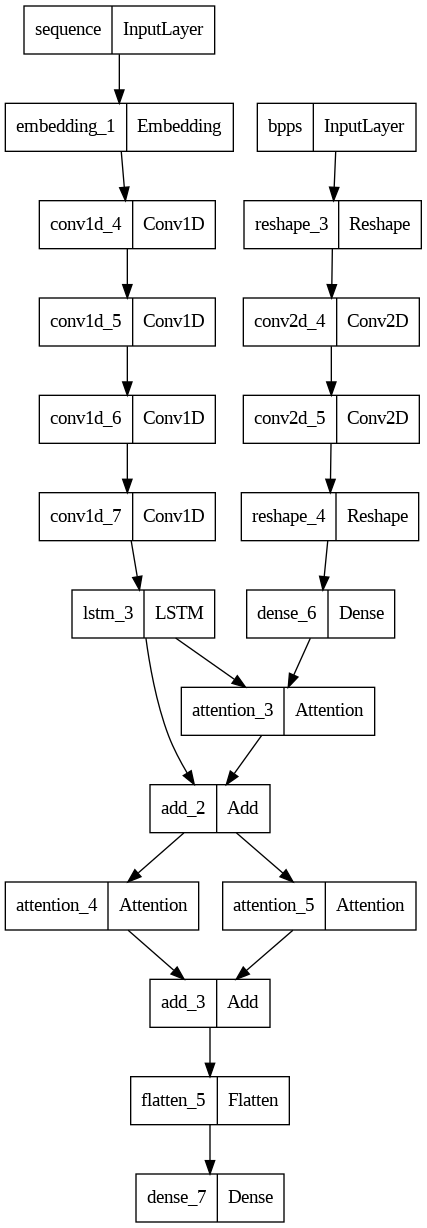

In [ ]:
plot_model(model)

### Fit the model

In [ ]:
# Train the model
history = model.fit(
    train_dataset,                # Tuple of inputs and targets (or "labels")
    validation_data = val_dataset,  # Data for validation
    epochs = 10,
    batch_size = 100,
    callbacks = [early_stopping, checkpoint]
)

### Nullrecurrent (OpenVaccine challenge-winning model) with GRU version

Based on the OppenVaccine challenge-winning model's architecture

In [ ]:
# Zip together the inputs and targets
# ((input_1, input_2), target)
train_dataset = tf.data.Dataset.zip(((train_sequence, train_bpps), train_reactivities))
val_dataset = tf.data.Dataset.zip(((val_sequences, val_bpps), val_reactivities))

In [ ]:
# Input
sequence_input = Input(shape=(206,), name='sequence')
bpps_input = Input(shape=(206*206,), name='bpps')

# Embedding Layer for sequence
embedded_sequence = Embedding(input_dim=5, output_dim=8, input_length=206)(sequence_input)

# 1D CNN Layers for sequence features
cnn_out = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(embedded_sequence)
cnn_out = Conv1D(filters=64, kernel_size=6, activation='relu', padding='same')(cnn_out)
cnn_out = Conv1D(filters=128, kernel_size=15, activation='relu', padding='same')(cnn_out)
cnn_out = Conv1D(filters=256, kernel_size=30, activation='relu', padding='same')(cnn_out)

# GRU Layer for sequence
gru_out = GRU(256, return_sequences=True)(cnn_out)

# Reshape BPPS input and apply 2D Convolution
bpps_reshaped = Reshape((206, 206, 1))(bpps_input)
conv2d_out = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(bpps_reshaped)
conv2d_out = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2d_out)
conv2d_out_flat = Reshape((206, 206*64))(conv2d_out)  # Flatten the spatial dimensions

# Reduce the dimensions of the Conv2D output
reduced_dim_out = Dense(256, activation='relu')(conv2d_out_flat)

# Apply Attention between GRU output and BPPS Conv2D output
attention_out = Attention()([gru_out, reduced_dim_out])

# Combine GRU and Attention outputs
combined = Add()([gru_out, attention_out])

# Direct use of MultiHeadAttention
multi_head_out = MultiHeadAttention(num_heads=2, key_dim=256)(combined, combined)

# Flatten and output
flattened = Flatten()(multi_head_out)
output = Dense(412, activation='linear')(flattened)

# Model
model = Model(inputs=[sequence_input, bpps_input], outputs=output)

#Create checkpoints to save the model across training
checkpoint = ModelCheckpoint(filepath = 'model_checkpoint.h5', #file path
                             save_best_only = True, #save only the best model
                             monitor = 'val_loss', #variable to monitor to save model
                             mode = 'min',
                             verbose = 1)

#Create early stoppings
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, restore_best_weights = True)

#compile the model
model.compile(loss = MeanSquaredError(),
              metrics = [MeanSquaredError(), MeanAbsoluteError()],
              optimizer = 'adam')

In [ ]:
# Print model summary
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence (InputLayer)       [(None, 206)]                0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 206, 8)               40        ['sequence[0][0]']            
                                                                                                  
 bpps (InputLayer)           [(None, 42436)]              0         []                            
                                                                                                  
 conv1d_20 (Conv1D)          (None, 206, 32)              800       ['embedding_5[0][0]']         
                                                                                            

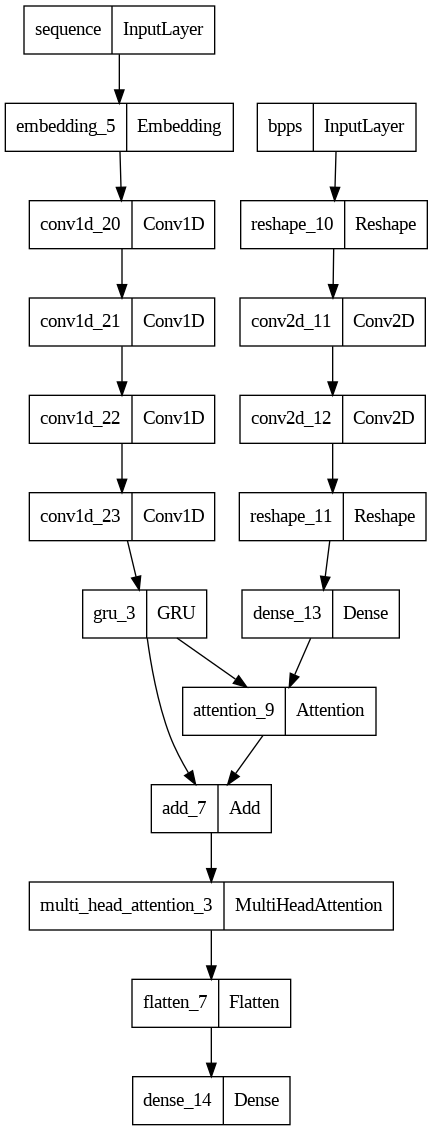

In [ ]:
plot_model(model)

### Fit the model

In [ ]:
# Train the model
history = model.fit(
    train_dataset,                # Tuple of inputs and targets (or "labels")
    validation_data = val_dataset,  # Data for validation
    epochs = 10,
    batch_size = 100,
    callbacks = [early_stopping, checkpoint]
)